## Installing Libraries

In [123]:
!pip install nbformat

In [124]:
!pip install graphviz

In [125]:
!pip install dtreeviz

In [126]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_context('notebook')
sns.set_style('white')

import dtreeviz

## Data Preparation

In [127]:
training = pd.read_csv("data/UNSW_NB15_training-set.csv")
testing = pd.read_csv("data/UNSW_NB15_testing-set.csv")
print("training ",training.shape)
print("testing ",testing.shape)

training  (82332, 45)
testing  (175341, 45)


In [128]:
all(training.columns == testing.columns)

True

In [129]:
df = pd.concat([training,testing]).drop('id',axis=1)
df = df.reset_index(drop=True)

df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [130]:
df.columns

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [132]:
df.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

## Categorical data

In [133]:
for col in ['proto', 'service', 'state']:
    df[col] = df[col].astype('category').cat.codes
    
df['attack_cat'] = df['attack_cat'].astype('category')

In [134]:
df.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,119,0,5,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,119,0,5,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,119,0,5,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,119,0,5,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,119,0,5,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


## Visualizing attacks categories

attack_cat
Generic           58871
Exploits          44525
Fuzzers           24246
DoS               16353
Reconnaissance    13987
Analysis           2677
Backdoor           2329
Shellcode          1511
Worms               174
Normal                0
Name: count, dtype: int64


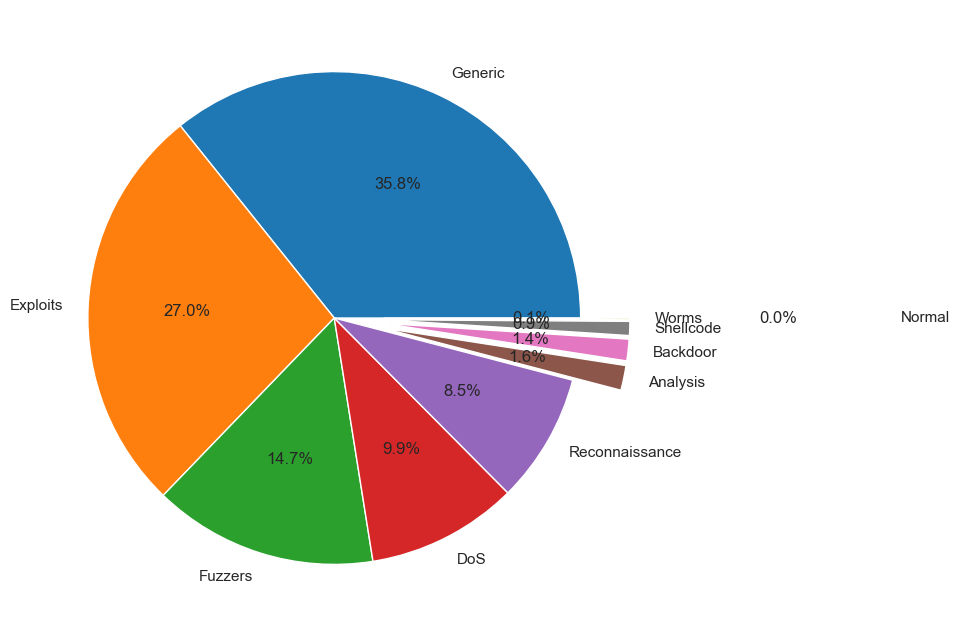

In [135]:
validAttacks = df[df['label']==1]['attack_cat'].value_counts()
print(validAttacks)

plt.figure(figsize = (15,8))
plt.pie(validAttacks,labels = validAttacks.index, autopct = '%1.1f%%',explode = [0,0,0,0,0,0.2,0.2,0.2,0.2,1.2])
plt.show()

* Generic and Exploits attacks are the most.

## Splitting data

In [136]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['attack_cat', 'label'])
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

feature_names = list(X.columns)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (180371, 42)
y_train shape:  (180371,)
X_test shape:  (77302, 42)
y_test shape:  (77302,)


## Decision Tree Model :
* Using a decision tree model to create a set of criteria for detecting cyber attacks. Conducting a grid search to optimize the model toward maximizing recall. Recall rate should be high to create the first layer of protection.

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best recall score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall score: 1.0


In [138]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

clf=grid_search.best_estimator_
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Recall:  1.0


## Visualizing the rules

* From the decision tree, we visualized the rule of tree as sttl<=61 and sttl>61

## Filtering data for potential attacks

In [139]:
X_test = X_test.reset_index(drop=True)

rules= "(sttl <= 61.00 & sinpkt<= 0.00) | (sttl >  61.00 )"

ind = X_test.query(rules).index

X_test_2 = X_test.loc[ind,:]
y_test_2 = y_test[ind]

print(X_test.shape)
print(X_test_2.shape)
print("filtered data" , (1- np.round(X_test_2.shape[0] / X_test.shape[0],2))*100, "%")

(77302, 42)
(59425, 42)
filtered data 23.0 %


* The rule based system filtered 23% of network traffic for further analysis, demonstrating its efficacy in detecting non-threatening network activity. Now, we will detect cyber attacks by applying the trained model to the filtered test data.

In [140]:
from sklearn.metrics import accuracy_score, precision_score

In [141]:
def model_evaluation(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test_2)
    
    accuracy = accuracy_score(y_test_2, y_pred)
    recall = recall_score(y_test_2, y_pred)
    precision = precision_score(y_test_2, y_pred)
    print("Recall: ", recall)
    print("Precision: ", precision)
    print("Accuracy: ", accuracy)
    
    cross = pd.crosstab(pd.Series(y_test_2, name='Actual'), pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize=(5, 5))
    sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
    plt.show()
    
    return {'Recall' : recall}

In [142]:
results = {}

## Random Forest Model

Recall:  0.9574038150662787
Precision:  0.9647140268360719
Accuracy:  0.9353639040807741


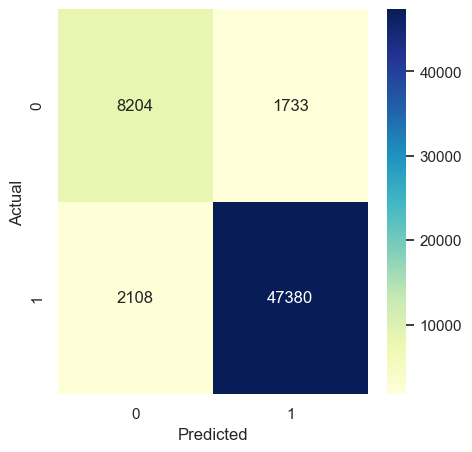

In [143]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=11)

results['Random Forest Model'] = model_evaluation(rf)

## Visualizing the rules present in the tree

In [144]:
from sklearn.tree import export_text
feature_names = list(X.columns)

print(export_text(rf.estimators_[99],feature_names=feature_names))

|--- dpkts <= 0.50
|   |--- ct_srv_src <= 2.50
|   |   |--- sbytes <= 53.00
|   |   |   |--- sinpkt <= 30000.02
|   |   |   |   |--- sbytes <= 26.00
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sbytes >  26.00
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- sinpkt >  30000.02
|   |   |   |   |--- class: 0.0
|   |   |--- sbytes >  53.00
|   |   |   |--- rate <= 0.11
|   |   |   |   |--- sbytes <= 62.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- sbytes >  62.50
|   |   |   |   |   |--- sttl <= 143.00
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- sttl >  143.00
|   |   |   |   |   |   |--- ct_src_dport_ltm <= 1.50
|   |   |   |   |   |   |   |--- sinpkt <= 5037.05
|   |   |   |   |   |   |   |   |--- ct_srv_dst <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- ct_srv_dst >  1.50
|   |   |   |   |   |   |   |   |   |--- sbytes <= 803.00
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
| 

Recall:  0.9517458777885548
Precision:  0.9657774405872583
Accuracy:  0.931729070256626


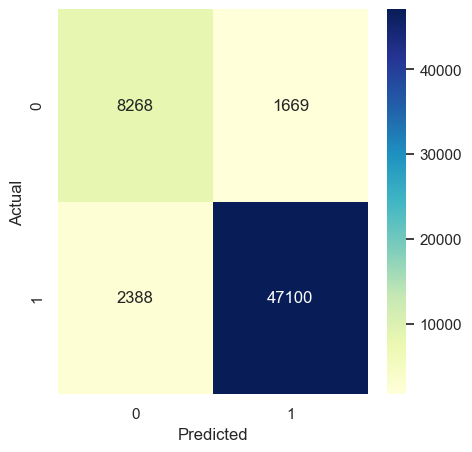

In [145]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

results['XGBoost Classifier'] = model_evaluation(xgbc)

[LightGBM] [Info] Number of positive: 115185, number of negative: 65186
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006432 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6184
[LightGBM] [Info] Number of data points in the train set: 180371, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.638600 -> initscore=0.569295
[LightGBM] [Info] Start training from score 0.569295
Recall:  0.9465122858066602
Precision:  0.964898547739211
Accuracy:  0.9267816575515355


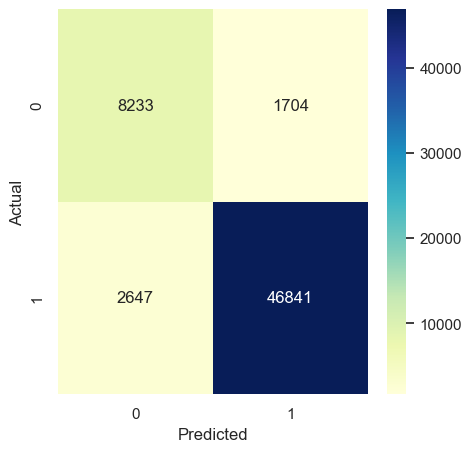

In [146]:
from lightgbm import LGBMClassifier

lgbc = LGBMClassifier()

results['Light GBM Classifier'] = model_evaluation(lgbc)

In [147]:
comparision = pd.DataFrame(results)
comparision

,Random Forest Model,XGBoost Classifier,Light GBM Classifier
Recall,0.957404,0.951746,0.946512


## Hypothesis testing:
#### Wilcoxon rank sum test:
* The Wilcoxon rank sum test is a non-parametric test, which means that it does not assume that the data is normally distributed. The Wilcoxon rank sum test will calculate a Z-statistic and a p-value. The Z-statistic is a measure of how much variation there is between the three recall scores. The p-value is a measure of the probability of getting a result as extreme as the one observed, if the null hypothesis is true. The null hypothesis is the hypothesis that there is no difference in the recall of the three models. If the p-value is less than 0.05, then we can reject the null hypothesis and conclude that there is a statistically significant difference in the recall of the three models.  

* Any of the three models can be applied to identify the important features to predict the cyber attacks.

## Correlations

* To improve our understanding of the variables involved in cyber attack detection, we need to analyze the network data. Correlation diagrams can be helpful in visualizing how different variables are associated with each other and with cyber attacks. Additionally, random forest models can help identify the importance of different features in predicting the target variable (cyber attacks). We can compare the feature rankings from the random forest with the results of the correlation analysis to gain a better understanding of the key features to focus on for effective cyber attack detection.

### Correlation of variables with cyber attack (label)

### The following variables are positively correlated with cyber attacks:

* sttl: Source to destination time to live value.
* ct_state_ttl and state: These features reflect various stages of TCP connections and may be related to port scanning, SYN flood, or DDoS attacks.
* ct_dst_sport_ltm: This feature measures the number of connections from the same source IP to the same destination port in a short time period.
* rate: This feature may represent various types of traffic rates or frequencies. 

### The following variables are negatively correlated with cyber attacks:

* swin
* dload

## Feature Ranking from Random Forest

In [148]:
feature_imp = pd.DataFrame({'Name':X.columns, 'Importance':rf.feature_importances_})

feature_imp = feature_imp.sort_values('Importance',ascending=False).reset_index(drop=True)

feature_imp[:10].style.background_gradient()

,Name,Importance
0,sttl,0.124350
1,ct_state_ttl,0.109396
2,rate,0.054975
3,dload,0.052097
4,sload,0.044616
5,sbytes,0.042870
6,ct_dst_src_ltm,0.041234
7,dttl,0.039693
8,smean,0.038556
9,ct_srv_dst,0.037512


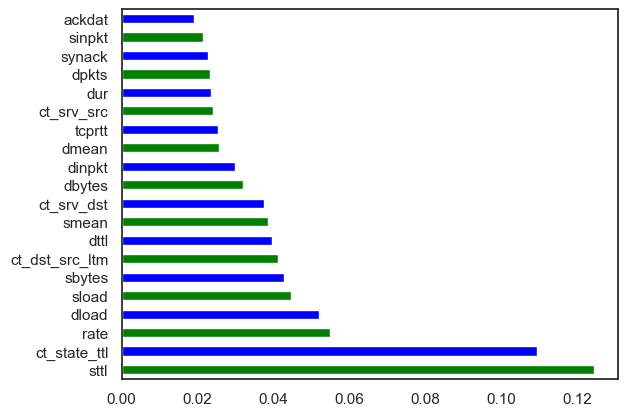

In [149]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh',color=['g','b']*5)
plt.show()

### Let's select only the top 10 features and find their associations with the type of cyber attack.


In [150]:
top10= feature_imp.Name[:10].tolist()
top10

['sttl',
 'ct_state_ttl',
 'rate',
 'dload',
 'sload',
 'sbytes',
 'ct_dst_src_ltm',
 'dttl',
 'smean',
 'ct_srv_dst']

In [151]:
X = df[top10]
y = df['label'].values

rf_top10 = RandomForestClassifier(random_state=11)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf_top10.fit(X_train, y_train)

y_pred = rf_top10.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)
 

Accuracy:  0.941760885876174


In [152]:

# top10= feature_imp.Name[:10].tolist()

# attack_names = np.array(df['attack_cat'].unique())

# X_top = df.loc[:, df.columns.isin(top10)]
# y_top = pd.factorize(df['attack_cat'])[0]


# clf_top10 = DecisionTreeClassifier(max_depth=6)

# X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y_top, test_size=0.3, random_state=11)

# clf_top10.fit(X_train_top, y_train_top)

# viz_model = dtreeviz.model(clf_top10,
#                            X_train=X_train_top, y_train=y_train_top, 
#                            class_names=attack_names,
#                            feature_names=top10)

# viz_model.view(fancy=False,scale=1) 

## Random Forest With Attack Category As the Prediction Labels


Accuracy:  0.822992936793356


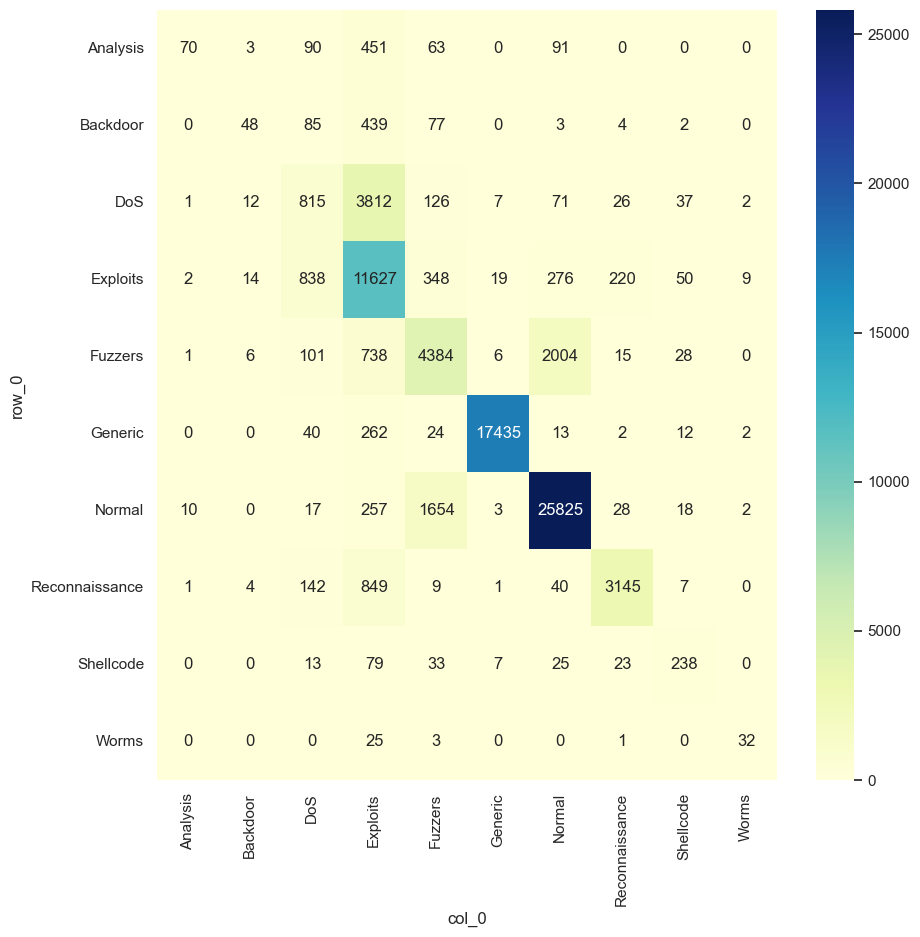

In [153]:
top10= feature_imp.Name[:10].tolist()

X = df.loc[:, df.columns.isin(top10)]

y = df['attack_cat'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

rf = RandomForestClassifier(random_state=11,min_samples_leaf= 1, min_samples_split= 5, n_estimators= 100)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

cross = pd.crosstab(y_test,  y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cross, annot=True,fmt='d', cmap="YlGnBu")
plt.show()


In [154]:
X_test.tail(10)

,sbytes,rate,sttl,dttl,sload,dload,smean,ct_state_ttl,ct_dst_src_ltm,ct_srv_dst
169593,200,100000.002500,254,0,8.000000e+07,0.000000e+00,100,2,10,7
27824,320,17.103508,31,29,2.810238e+03,1.777712e+04,53,0,1,2
62057,17778,55.733642,254,252,2.440774e+05,1.044197e+04,808,1,2,4
21780,114,500000.001300,254,0,2.280000e+08,0.000000e+00,57,2,36,36
217905,586,125000.000300,254,0,2.930000e+08,0.000000e+00,293,2,1,1
153035,200,111111.107200,254,0,8.888889e+07,0.000000e+00,100,2,7,7
98722,1470,7163.323853,31,29,2.298813e+06,2.627916e+06,67,0,3,5
215200,114,125000.000300,254,0,5.700000e+07,0.000000e+00,57,2,27,27
207752,1006,75.213983,254,252,3.634340e+04,8.985563e+03,101,1,1,1
130204,588,21.869228,254,252,5.454443e+03,3.190334e+03,59,1,2,2


In [155]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                precision    recall  f1-score   support

      Analysis       0.82      0.09      0.16       768
      Backdoor       0.55      0.07      0.13       658
           DoS       0.38      0.17      0.23      4909
      Exploits       0.63      0.87      0.73     13403
       Fuzzers       0.65      0.60      0.63      7283
       Generic       1.00      0.98      0.99     17790
        Normal       0.91      0.93      0.92     27814
Reconnaissance       0.91      0.75      0.82      4198
     Shellcode       0.61      0.57      0.59       418
         Worms       0.68      0.52      0.59        61

      accuracy                           0.82     77302
     macro avg       0.71      0.56      0.58     77302
  weighted avg       0.82      0.82      0.81     77302



* Generic, Normal, and Exploits attacks have high recalls.

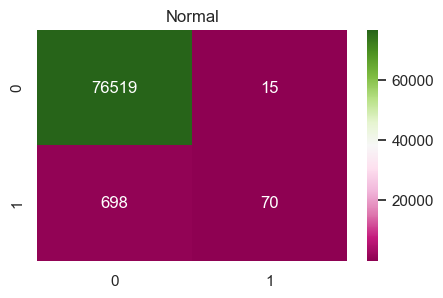

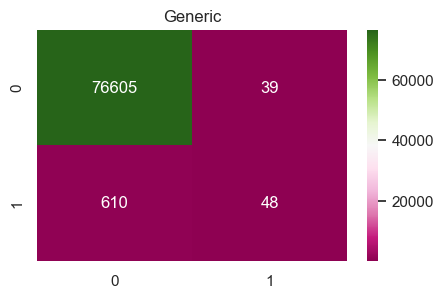

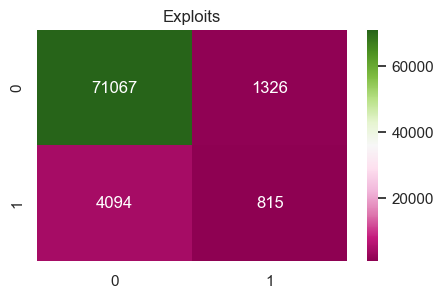

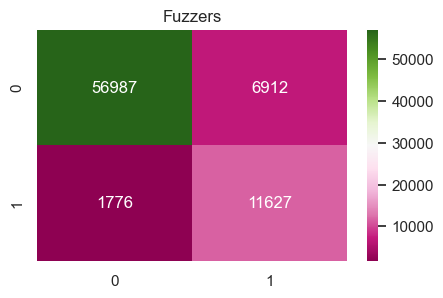

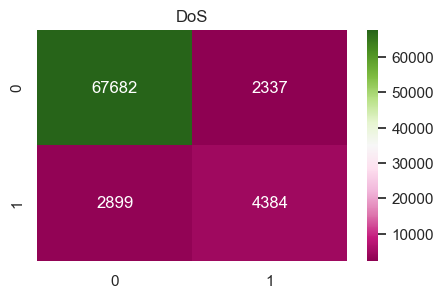

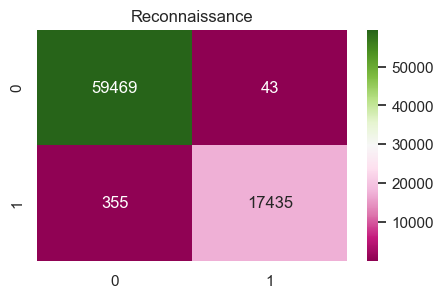

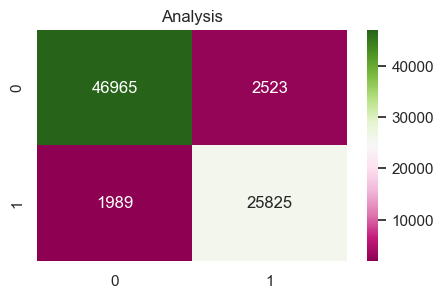

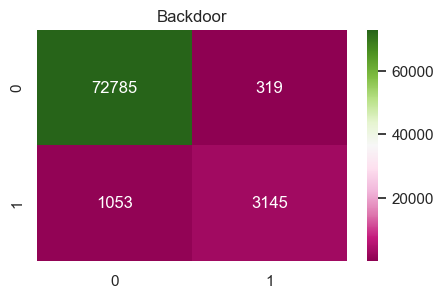

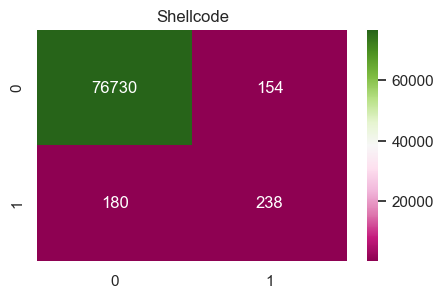

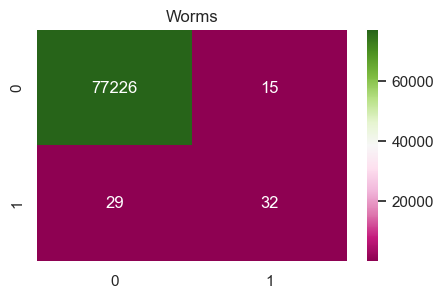

In [156]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(y_test,y_pred)
for i,j in zip(mcm,df['attack_cat'].value_counts().index):
    plt.subplots(figsize = (5,3))
    sns.heatmap(i,annot=True,fmt = 'd',cmap = "PiYG")
    plt.title(j)

* Fuzzers, Reconaissance, and Analysis has true negatives and false negatives.

In [157]:
import pickle
# Save model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(rf, f)

In [158]:
from joblib import dump, load

# Save model
dump(rf, "rf_model.joblib")


['rf_model.joblib']

## Conclusion

* The Random Forest Model is best for cyber attack detection.
* Decision Tree Model was used to identify the rules of cyber attack detection.
* From this analysis, most important features were identified which has major role in cyber attack detection.
* Random Forest Model is performing well in accuracy with both dependent feature, label and attack category.

In [159]:
import pandas as pd
df=pd.read_csv("sample_acm.csv", index_col=0)
df

,sbytes,rate,sttl,dttl,sload,dload,smean,ct_state_ttl,ct_dst_src_ltm,ct_srv_dst
13778,114,1.000000e+06,254,0,4.560000e+08,0.000000e+00,57,2,32,32
116836,37210,2.427945e+03,31,29,7.622180e+06,6.892231e+05,716,0,3,2
209312,114,2.500000e+05,254,0,1.140000e+08,0.000000e+00,57,2,20,20
174481,18480,2.795970e+00,254,0,9.841814e+03,0.000000e+00,440,2,1,1
217594,114,1.111111e+05,254,0,5.066666e+07,0.000000e+00,57,2,23,23
21076,114,3.333333e+05,254,0,1.520000e+08,0.000000e+00,57,2,39,39
8835,8660,1.497083e+01,62,252,2.311775e+04,4.361734e+03,361,1,1,1
75044,2516,2.659461e+01,254,252,3.212629e+04,3.177170e+03,252,1,3,3
54058,114,3.333333e+05,254,0,1.520000e+08,0.000000e+00,57,2,2,9
83401,1540,1.340669e+01,31,29,4.693155e+03,5.047417e+03,96,0,7,17


In [160]:
import joblib
model=joblib.load('rf_model.joblib')



In [161]:
model.predict(df)

array(['Generic', 'Normal', 'Generic', 'Exploits', 'Generic', 'Generic',
       'Exploits', 'Normal', 'Generic', 'Normal', 'DoS', 'Normal',
       'Fuzzers', 'Generic', 'DoS', 'Exploits', 'Normal', 'Generic',
       'Exploits', 'Normal'], dtype=object)

In [162]:
X_test.tail(20)

,sbytes,rate,sttl,dttl,sload,dload,smean,ct_state_ttl,ct_dst_src_ltm,ct_srv_dst
13778,114,1.000000e+06,254,0,4.560000e+08,0.000000e+00,57,2,32,32
116836,37210,2.427945e+03,31,29,7.622180e+06,6.892231e+05,716,0,3,2
209312,114,2.500000e+05,254,0,1.140000e+08,0.000000e+00,57,2,20,20
174481,18480,2.795970e+00,254,0,9.841814e+03,0.000000e+00,440,2,1,1
217594,114,1.111111e+05,254,0,5.066666e+07,0.000000e+00,57,2,23,23
21076,114,3.333333e+05,254,0,1.520000e+08,0.000000e+00,57,2,39,39
8835,8660,1.497083e+01,62,252,2.311775e+04,4.361734e+03,361,1,1,1
75044,2516,2.659461e+01,254,252,3.212629e+04,3.177170e+03,252,1,3,3
54058,114,3.333333e+05,254,0,1.520000e+08,0.000000e+00,57,2,2,9
83401,1540,1.340669e+01,31,29,4.693155e+03,5.047417e+03,96,0,7,17


In [163]:
model.predict(X_test)

array(['Normal', 'Generic', 'Normal', ..., 'Generic', 'Exploits',
       'Normal'], dtype=object)

In [164]:
# import pandas as pd

# info = {
#     "n_estimators": model.n_estimators,
#     "max_depth": model.max_depth,
#     "n_features": model.n_features_in_,
#     "feature_importance": model.feature_importances_,
# }

# df_info = pd.DataFrame(info, index=["Value"])
# print(df_info.T)

In [165]:

# # Feature names (from your data preprocessing)
# feature_names = [
#     'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes',
#     'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt',
#     'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt',
#     'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len',
#     'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
#     'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd',
#     'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports'
# ]

# # Sample normal traffic entry (label=0)
# normal_entry = {
#     'dur': 0.000011, 'proto': 119, 'service': 0, 'state': 5,
#     'spkts': 2, 'dpkts': 0, 'sbytes': 496, 'dbytes': 0,
#     'rate': 90909.09, 'sttl': 254, 'dttl': 0, 'sload': 0.0,
#     'dload': 0.0, 'sloss': 0, 'dloss': 0, 'sinpkt': 0.0,
#     'dinpkt': 0.0, 'sjit': 0.0, 'djit': 0.0, 'swin': 0,
#     'stcpb': 0, 'dtcpb': 0, 'dwin': 0, 'tcprtt': 0.0,
#     'synack': 0.0, 'ackdat': 0.0, 'smean': 0, 'dmean': 0,
#     'trans_depth': 0, 'response_body_len': 0, 'ct_srv_src': 1,
#     'ct_state_ttl': 0, 'ct_dst_ltm': 0, 'ct_src_dport_ltm': 1,
#     'ct_dst_sport_ltm': 1, 'ct_dst_src_ltm': 2, 'is_ftp_login': 0,
#     'ct_ftp_cmd': 0, 'ct_flw_http_mthd': 0, 'ct_src_ltm': 1,
#     'ct_srv_dst': 2, 'is_sm_ips_ports': 0
# }

# # Sample malicious traffic entry (label=1 - Generic attack)
# malicious_entry = {
#     'dur': 0.000015, 'proto': 102, 'service': 3, 'state': 3,
#     'spkts': 100, 'dpkts': 0, 'sbytes': 800, 'dbytes': 0,
#     'rate': 250000.0, 'sttl': 60, 'dttl': 0, 'sload': 1000000.0,
#     'dload': 0.0, 'sloss': 0, 'dloss': 0, 'sinpkt': 0.0,
#     'dinpkt': 0.0, 'sjit': 500.0, 'djit': 0.0, 'swin': 0,
#     'stcpb': 0, 'dtcpb': 0, 'dwin': 0, 'tcprtt': 0.0,
#     'synack': 0.0, 'ackdat': 0.0, 'smean': 100, 'dmean': 0,
#     'trans_depth': 0, 'response_body_len': 0, 'ct_srv_src': 50,
#     'ct_state_ttl': 100, 'ct_dst_ltm': 50, 'ct_src_dport_ltm': 100,
#     'ct_dst_sport_ltm': 100, 'ct_dst_src_ltm': 200, 'is_ftp_login': 0,
#     'ct_ftp_cmd': 0, 'ct_flw_http_mthd': 0, 'ct_src_ltm': 100,
#     'ct_srv_dst': 200, 'is_sm_ips_ports': 0
# }

# # Convert to DataFrame and predict
# normal_df = pd.DataFrame([normal_entry], columns=feature_names)
# malicious_df = pd.DataFrame([malicious_entry], columns=feature_names)

# print("Normal traffic prediction:", model.predict(normal_df)[0])
# print("Malicious traffic prediction:", model.predict(malicious_df)[0])

In [166]:
X_test.tail(10)

,sbytes,rate,sttl,dttl,sload,dload,smean,ct_state_ttl,ct_dst_src_ltm,ct_srv_dst
169593,200,100000.002500,254,0,8.000000e+07,0.000000e+00,100,2,10,7
27824,320,17.103508,31,29,2.810238e+03,1.777712e+04,53,0,1,2
62057,17778,55.733642,254,252,2.440774e+05,1.044197e+04,808,1,2,4
21780,114,500000.001300,254,0,2.280000e+08,0.000000e+00,57,2,36,36
217905,586,125000.000300,254,0,2.930000e+08,0.000000e+00,293,2,1,1
153035,200,111111.107200,254,0,8.888889e+07,0.000000e+00,100,2,7,7
98722,1470,7163.323853,31,29,2.298813e+06,2.627916e+06,67,0,3,5
215200,114,125000.000300,254,0,5.700000e+07,0.000000e+00,57,2,27,27
207752,1006,75.213983,254,252,3.634340e+04,8.985563e+03,101,1,1,1
130204,588,21.869228,254,252,5.454443e+03,3.190334e+03,59,1,2,2


In [167]:
model.predict(X_test.tail(10))

array(['DoS', 'Normal', 'Fuzzers', 'Generic', 'DoS', 'Exploits', 'Normal',
       'Generic', 'Exploits', 'Normal'], dtype=object)